<a href="https://colab.research.google.com/github/abhibootcamp/Data-Science-Abhishek/blob/master/Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install face_recognition

In [ ]:
import PIL.Image
import PIL.ImageDraw

In [ ]:
import face_recognition
image = face_recognition.load_image_file("/content/drive/MyDrive/Colab Notebooks/people.jpg")
face_locations = face_recognition.face_locations(image)

In [ ]:
number_of_faces = len(face_locations)
print("I found {} face(s) in this photograph.".format(number_of_faces))

I found 6 face(s) in this photograph.


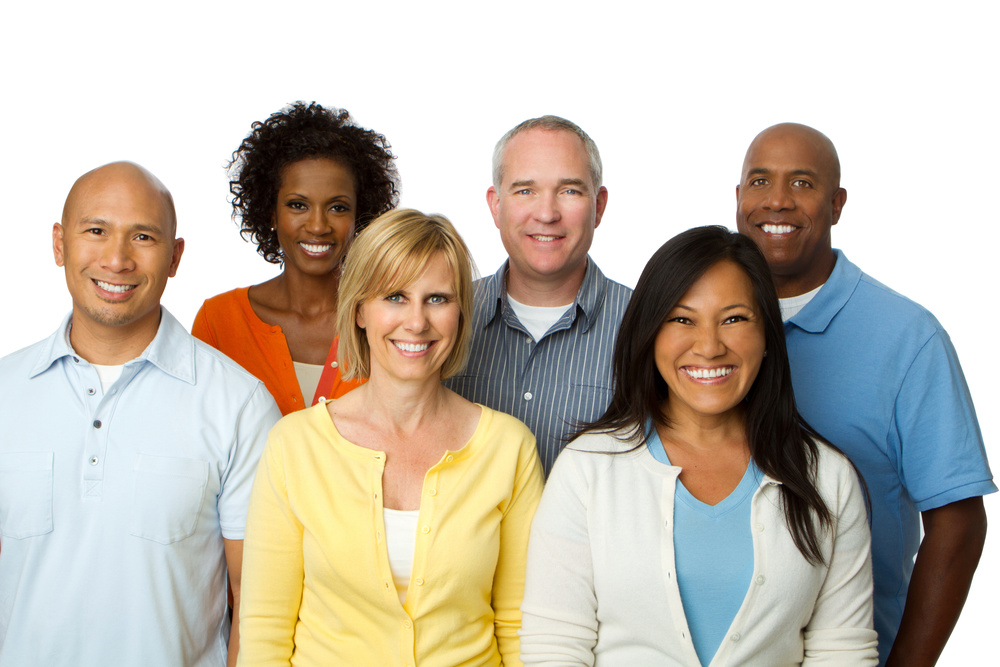

In [ ]:
pil_image = PIL.Image.fromarray(image)
pil_image

In [ ]:
for face_location in face_locations:

    # Print the location of each face in this image. Each face is a list of co-ordinates in (top, right, bottom, left) order.
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # Let's draw a box around the face
    draw = PIL.ImageDraw.Draw(pil_image)
    draw.rectangle([left, top, right, bottom], outline="yellow")

A face is located at pixel location Top: 163, Left: 497, Bottom: 271, Right: 605
A face is located at pixel location Top: 186, Left: 275, Bottom: 275, Right: 364
A face is located at pixel location Top: 211, Left: 67, Bottom: 319, Right: 175
A face is located at pixel location Top: 295, Left: 653, Bottom: 402, Right: 760
A face is located at pixel location Top: 271, Left: 366, Bottom: 378, Right: 474
A face is located at pixel location Top: 152, Left: 724, Bottom: 259, Right: 832


In [ ]:
pil_image.save('people1.jpg')

In [ ]:
face_landmarks_list = face_recognition.face_landmarks(image)

In [ ]:
for face_landmarks in face_landmarks_list:

    # Loop over each facial feature (eye, nose, mouth, lips, etc)
    for name, list_of_points in face_landmarks.items():

        # Print the location of each facial feature in this image
        print("The {} in this face has the following points: {}".format(name, list_of_points))

        # Let's trace out each facial feature in the image with a line!
        draw.line(list_of_points, fill="red", width=2)


The chin in this face has the following points: [(497, 193), (498, 206), (499, 219), (500, 232), (504, 244), (512, 255), (521, 264), (532, 271), (544, 274), (557, 272), (569, 266), (579, 258), (588, 247), (593, 234), (596, 221), (597, 208), (598, 194)]
The left_eyebrow in this face has the following points: [(508, 186), (514, 182), (520, 179), (528, 179), (536, 181)]
The right_eyebrow in this face has the following points: [(558, 180), (566, 179), (574, 179), (582, 180), (588, 186)]
The nose_bridge in this face has the following points: [(547, 191), (546, 200), (546, 208), (545, 217)]
The nose_tip in this face has the following points: [(536, 221), (541, 223), (546, 225), (551, 223), (556, 221)]
The left_eye in this face has the following points: [(517, 193), (522, 190), (528, 190), (533, 193), (527, 194), (522, 194)]
The right_eye in this face has the following points: [(562, 193), (567, 190), (573, 190), (578, 193), (573, 194), (567, 194)]
The top_lip in this face has the following p

In [ ]:
pil_image.save('people2.jpg')

In [ ]:
image_of_person_1 = face_recognition.load_image_file("person_1.jpg")
image_of_person_2 = face_recognition.load_image_file("person_2.jpg")
image_of_person_3 = face_recognition.load_image_file("person_3.jpg")

In [ ]:
person_1_face_encoding = face_recognition.face_encodings(image_of_person_1)[0]
person_2_face_encoding = face_recognition.face_encodings(image_of_person_2)[0]
person_3_face_encoding = face_recognition.face_encodings(image_of_person_3)[0]

In [ ]:
# Create a list of all known face encodings
known_face_encodings = [
    person_1_face_encoding,
    person_2_face_encoding,
    person_3_face_encoding
]


In [ ]:
unknown_image = face_recognition.load_image_file("unknown_7.jpg")

In [ ]:
# Get face encodings for any people in the picture
face_locations = face_recognition.face_locations(unknown_image, number_of_times_to_upsample=2)
unknown_face_encodings = face_recognition.face_encodings(unknown_image, known_face_locations=face_locations)

In [ ]:
# There might be more than one person in the photo, so we need to loop over each face we found
for unknown_face_encoding in unknown_face_encodings:

    # Test if this unknown face encoding matches any of the three people we know
    results = face_recognition.compare_faces(known_face_encodings, unknown_face_encoding, tolerance=0.6)

    name = "Unknown"

    if results[0]:
        name = "Person 1"
    elif results[1]:
        name = "Person 2"
    elif results[2]:
        name = "Person 3"

    print(f"Found {name} in the photo!")


Found Person 2 in the photo!
